In [1]:
# Import Libraries
import numpy as np

from project_utils.bb_model         import BB_Model
from project_utils.feature_stats    import Feature_Statistics
from project_utils.feature_stats    import Regression_Container
from project_utils.acq_data_capture import Acq_Data
from project_utils.surroagte_gp     import Surrogate_GP



Num_Points = 1


(1000,)


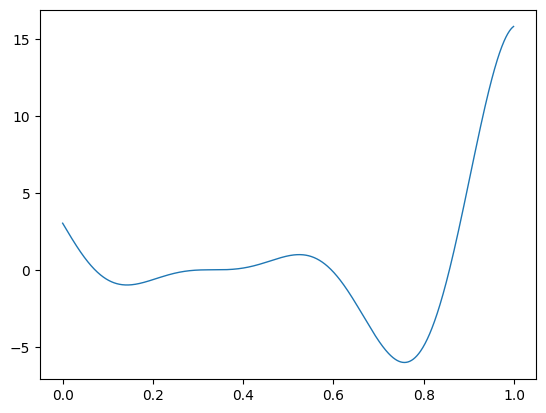

(1000, 1)


In [2]:
# Load Forrester model

Forrester_Data = BB_Model('Forrester')

#Forrester_Data.df().head()

In [3]:
Forrester_Data.MPL()

C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.2967129525278268


MLPRegressor(random_state=RandomState(MT19937) at 0x136CF399840)

In [4]:
Forrester_Data.Random_Forest()

0.9999459076328143


RandomForestRegressor(random_state=RandomState(MT19937) at 0x136CF399840)

In [5]:
Forrester_Data.GP()

0.9946521183464583


GaussianProcessRegressor()

In [6]:
print(Forrester_Data.get_features())

['X']


In [7]:
#Default settings
from unravel_2.ur_model import UR_Model

X_train, X_test, y_train, y_test = Forrester_Data.get_TT_data()

#Initializing the explainer object
URM_Exp = UR_Model(bbox_model           = Forrester_Data.get_GP(),
                   train_data           = X_train,
                   feature_names        = Forrester_Data.get_features(),
                   categorical_features = Forrester_Data.get_catagorical(),
                   mode                 = Forrester_Data.get_mode(),
                   sampling_optimize    = "opt")

#sur_GP = Surrogate_GP()


In [8]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
print('Mean 0:', mean)
print('Std 0: ', std)


Mean 0: [0.49681875]
Std 0:  [0.2894809]


In [9]:
# Generate explantion data for Random Forest

Forrester_Stats = Feature_Statistics(feature_names = Forrester_Data.get_features(), mode = Forrester_Data.get_mode())

if Num_Points == 0: Num_Points = X_test.shape[0]

for test_instance in range(Num_Points):

    print('INSTANCE: ', test_instance)
       
#    data_row  = np.array([X_test[test_instance]])
    data_row  = np.array([0.4])
    print('data row ',data_row)
    
    #scores, acq_data = URM_Exp.explain(X_init            = data_row.reshape(1, -1),
    scores = URM_Exp.explain(X_init      = data_row.reshape(-1, 1),
                             kernel_type = "Matern",
                             max_iter    = 20,
                             alpha       = "FUR_W",
                             #jitter=5,
                             interval    = 1,
                             normalize   = False)
       
    f_predict = Forrester_Data.get_Random_Forest().predict(data_row.reshape(1, -1))

    e_predict = URM_Exp.exp_predict(data_row.reshape(-1, 1))
    e_predict = np.array(e_predict).ravel()
    
    acq_data = URM_Exp.get_acq_data()
    
#    X, y = URM_Exp.get_surrogate_data()

#    e_predict = sur_GP.predict(X, y)
#    e_predict = sur_GP.predict(URM_Exp.get_surrogate_data())

    print(f_predict, e_predict)
    
    Forrester_Stats.Add_Sample(sample_scores = scores,
                               outcome       = y_test[test_instance],
                               X_row         = data_row,
                               f_prediction  = f_predict,
                               e_prediction  = e_predict.ravel(),
                               feopt         = acq_data.get_fe_x0(),
                               model         = URM_Exp.get_exp_model())


INSTANCE:  0
data row  [0.4]
Bounds:  Bounds(array([0.1105191]), array([0.6894809]))
      fun: -0.174070476771965
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.07494216])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.1105191])
NEXT X:  [[0.1105191]]


C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Bounds:  Bounds(array([0.1105191]), array([0.6894809]))
      fun: -0.4999999971059707
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.07880586])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 108
      nit: 6
     njev: 54
   status: 0
  success: True
        x: array([0.11511692])
NEXT X:  [[0.11511692]]
Bounds:  Bounds(array([0.1105191]), array([0.6894809]))
      fun: -0.2912657071071899
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.16408832])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.6894809])
NEXT X:  [[0.6894809]]
Bounds:  Bounds(array([0.1105191]), array([0.6894809]))
      fun: -0.39165282016397024
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([6.62248031e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 14
      nit: 2
     njev: 7

In [10]:
import matplotlib.pyplot as plt


In [11]:
print(f_predict)
print(e_predict)


[0.11505352]
[4.54879761e-01 1.00000004e-05]


In [12]:
Forrester_Stats.Fidelity()

Average, Var, and Max Differences:
y - BB(x):           0.8504539371428759  :  0.0  :  0.8504539371428759
y - exp(x):          0.5106276931402987  :  0.0  :  0.5106276931402987
BB(x) - exp(x):      0.3398262440025772  :  0.0  :  0.3398262440025772
Average exp(x) var:  1.0000000413701846e-05


In [13]:
#Forrester_Stats.Jaccard_Values()

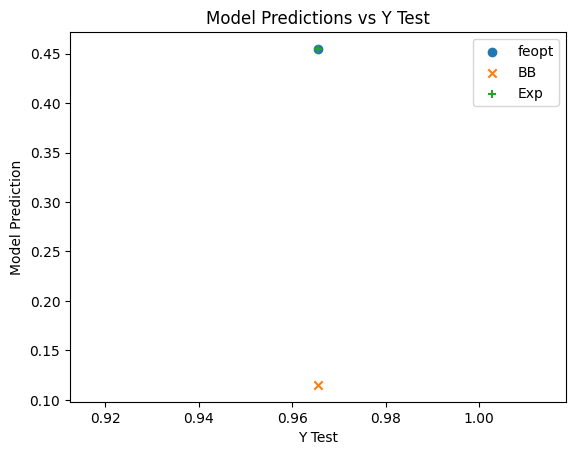

In [14]:
Forrester_Stats.Reg_Fidelity_Graph()

In [15]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RBF

#X, y = URM_Exp.get_surrogate_data()
#kernel = Matern()

#GP = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer = 10, optimizer='fmin_l_bfgs_b', normalize_y = False, copy_X_train=True)
#GP.fit(X, y)
        
#print(y[0])
#fe = GP.predict(X[0].reshape(1,-1))
#print(fe)
#ey = URM_Exp.gpmodel_predict(X[0].reshape(1,-1))
#print(ey)


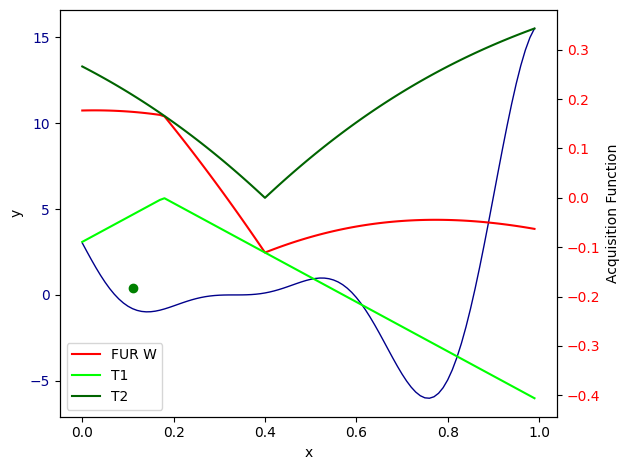

In [16]:
acq_data.plot_point()

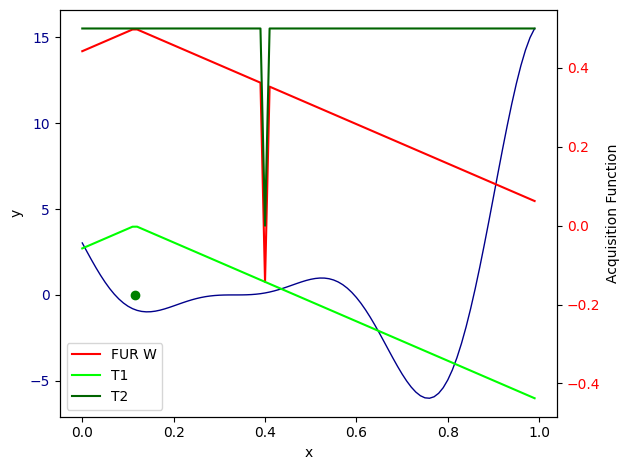

In [17]:
acq_data.plot_point(1)

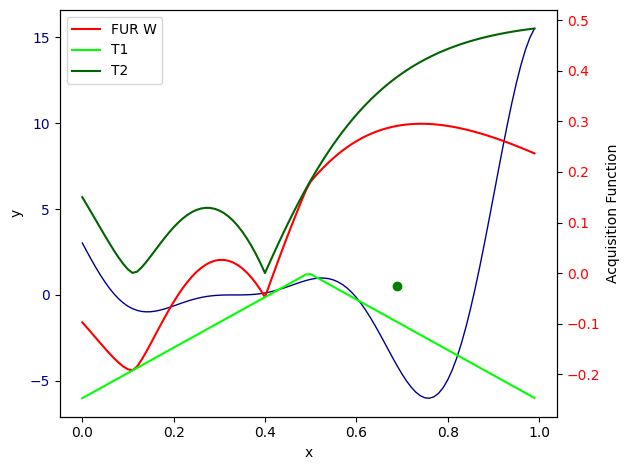

In [18]:
acq_data.plot_point(2)

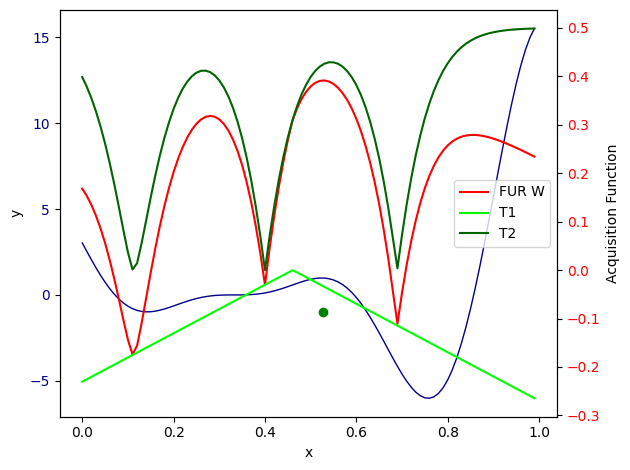

In [19]:
acq_data.plot_point(3)

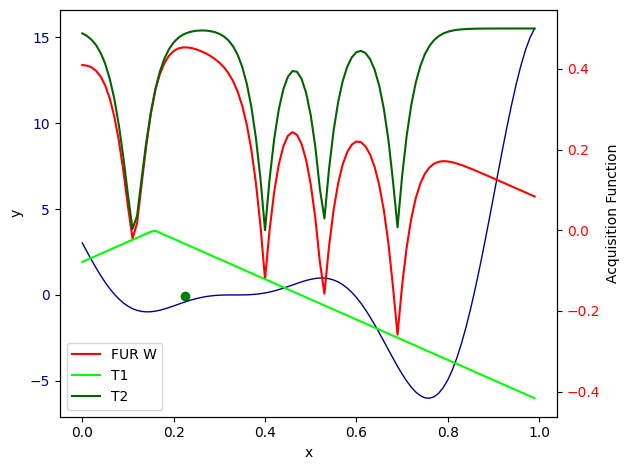

In [20]:
acq_data.plot_point(4)

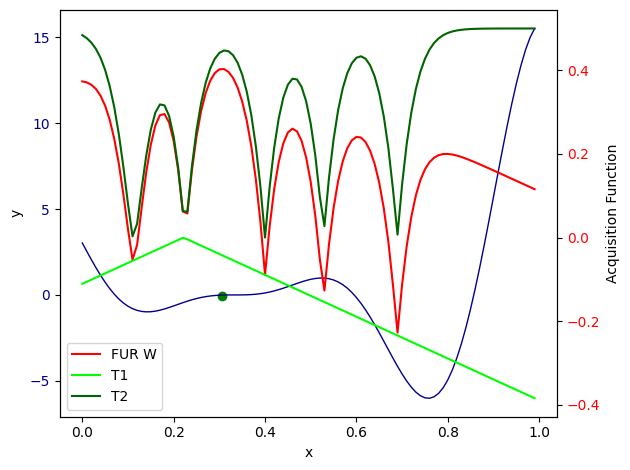

In [21]:
acq_data.plot_point(5)

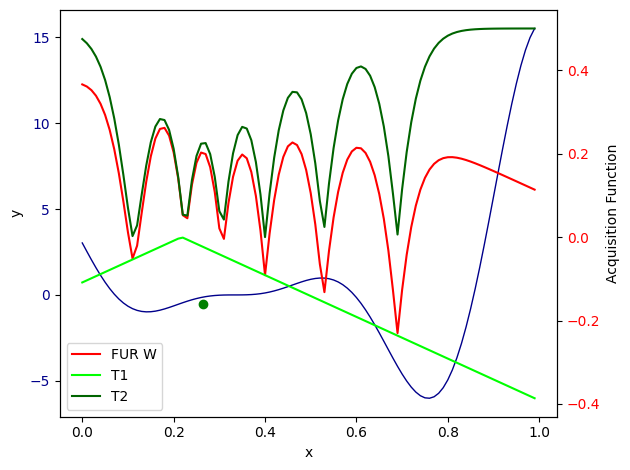

In [22]:
acq_data.plot_point(6)

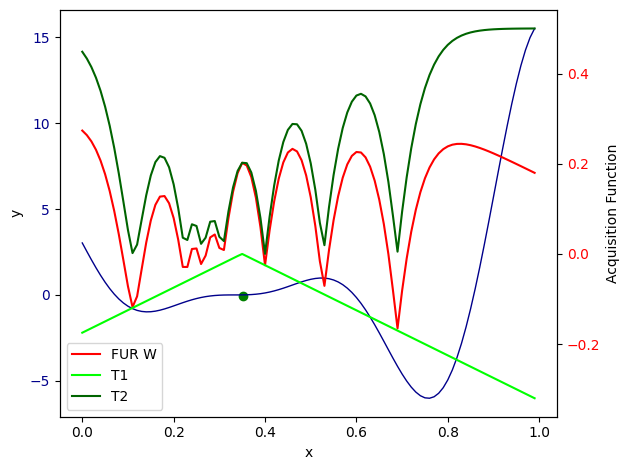

In [23]:
acq_data.plot_point(7)

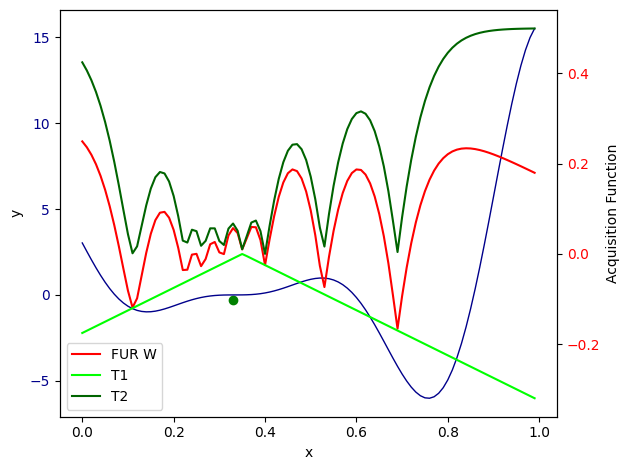

In [24]:
acq_data.plot_point(8)

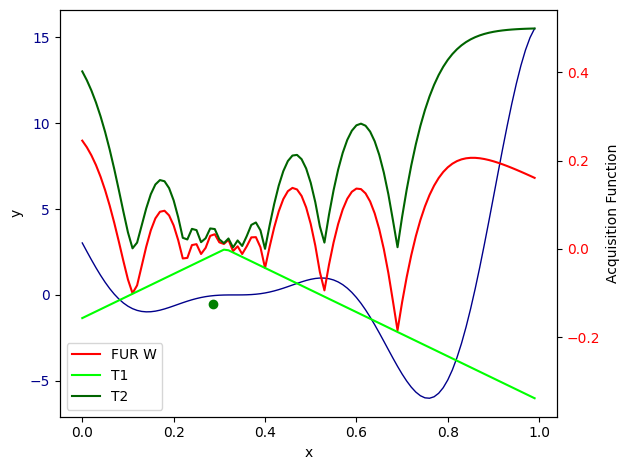

In [25]:
acq_data.plot_point(9)

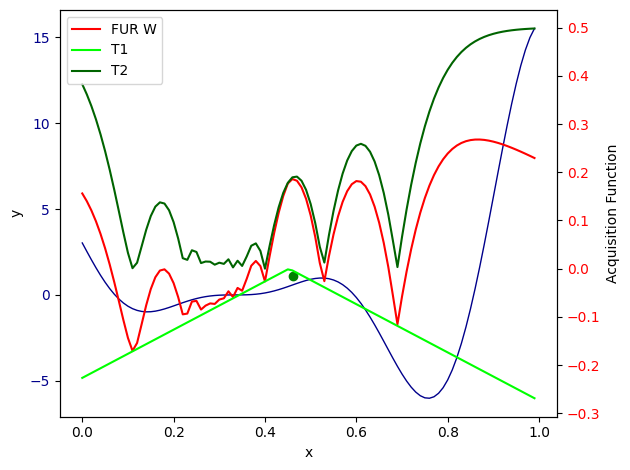

In [26]:
acq_data.plot_point(10)

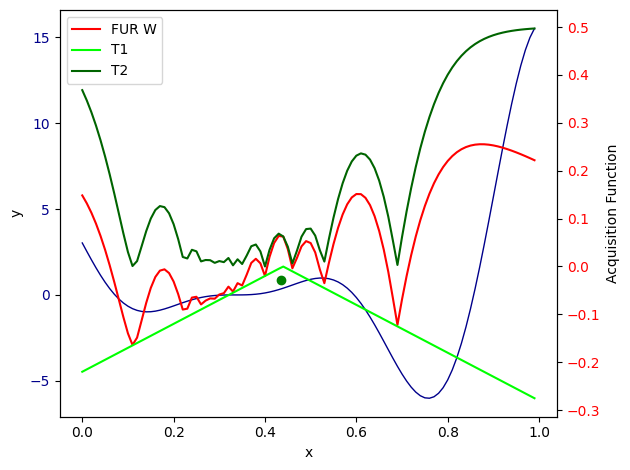

In [27]:
acq_data.plot_point(11)

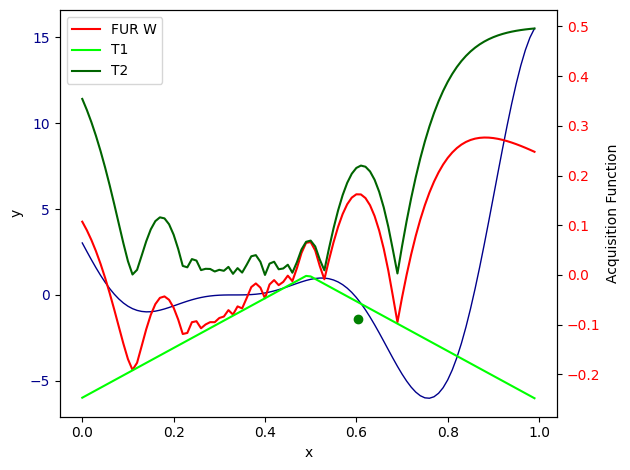

In [28]:
acq_data.plot_point(12)

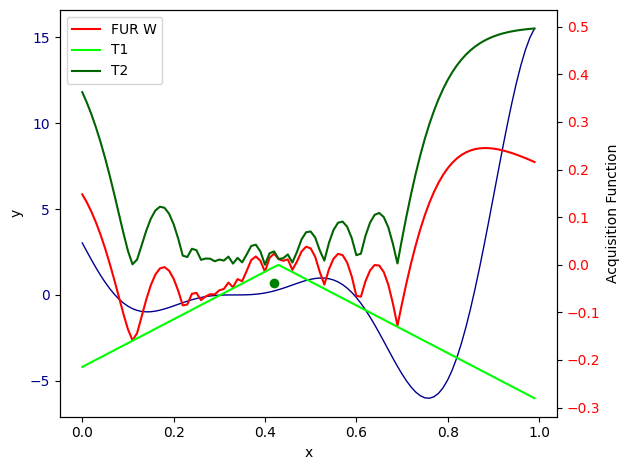

In [29]:
acq_data.plot_point(13)

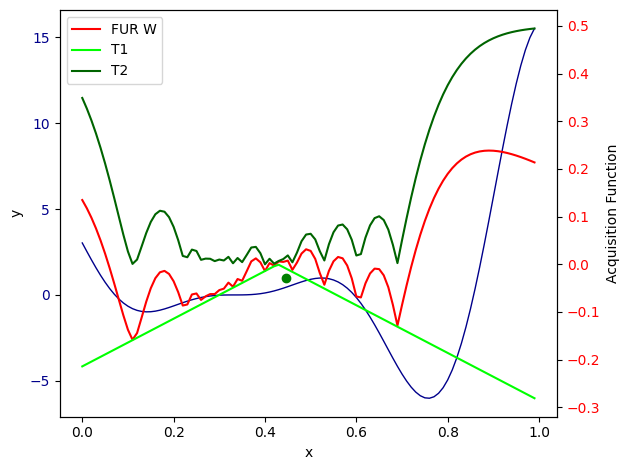

In [30]:
acq_data.plot_point(14)

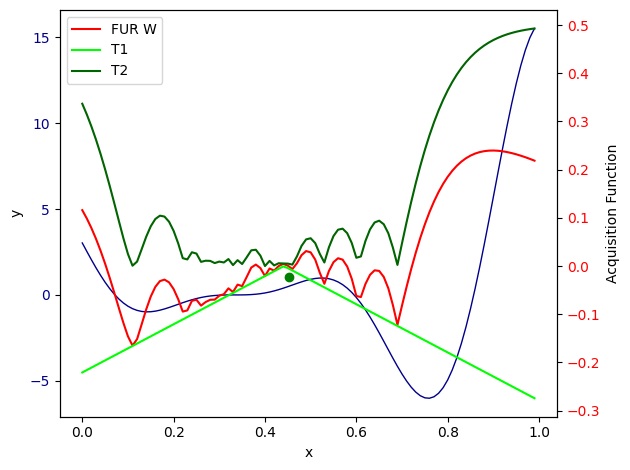

In [31]:
acq_data.plot_point(15)

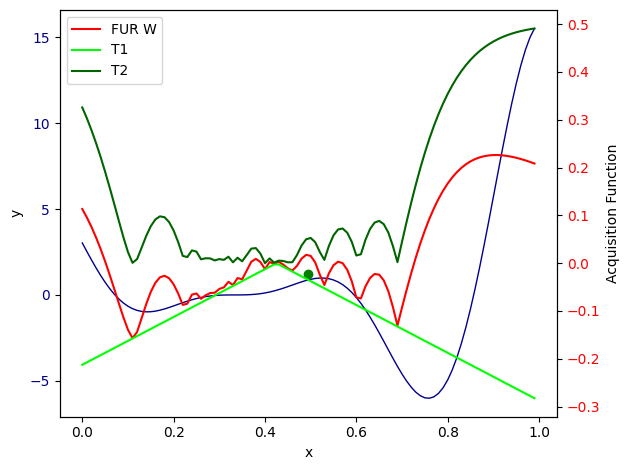

In [32]:
acq_data.plot_point(16)

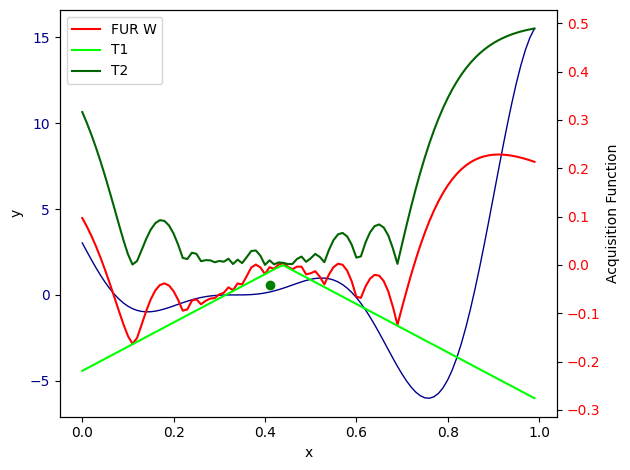

In [33]:
acq_data.plot_point(17)

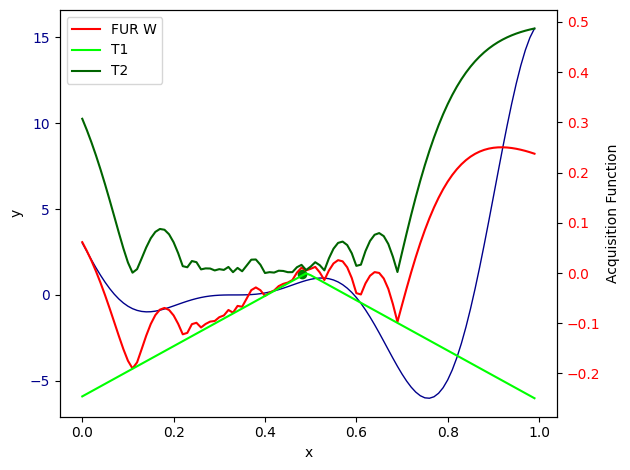

In [34]:
acq_data.plot_point(18)

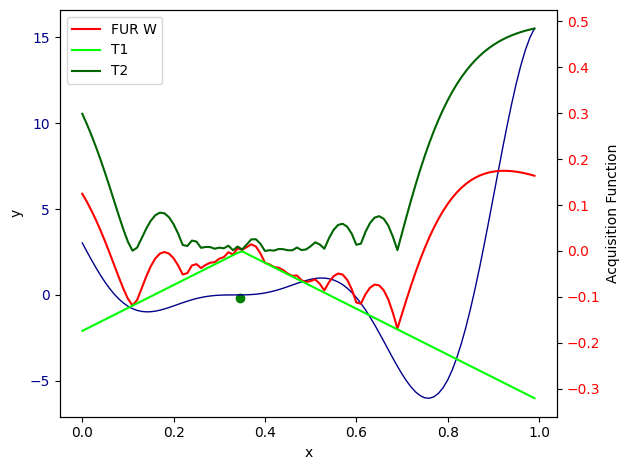

In [35]:
acq_data.plot_point(19)

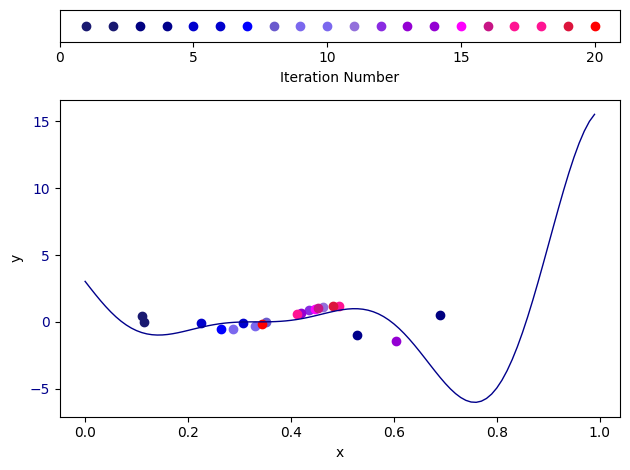

In [36]:
acq_data.plot_all()